In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [2]:
# Load the dataset (already loaded, repeating for context here)
dataset = pd.read_excel('./EV_Charging_Cybersecurity_Dataset.xlsx')


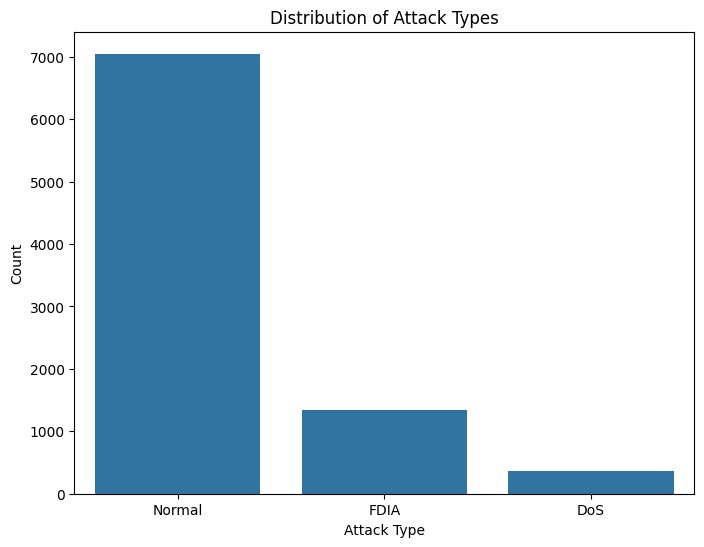

Class distribution:
 Attack_Type
Normal    7050
FDIA      1346
DoS        364
Name: count, dtype: int64


In [3]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Attack_Type', data=dataset)
plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

# Print class distribution counts
class_counts = dataset['Attack_Type'].value_counts()
print("Class distribution:\n", class_counts)


In [4]:
# Encode the target variable 'Attack_Type' (if categorical) using Label Encoding
label_encoder = LabelEncoder()
dataset['Attack_Type'] = label_encoder.fit_transform(dataset['Attack_Type'])
dataset.head()

,EV_ID,Charge_Start_Time,Charge_End_Time,SoC_Before,SoC_After,Energy_Consumed,Charging_Price,Packet_Count,Response_Time,Attack_Type
0,22,2022-01-01 04:29:45.299,2022-01-01 05:57:45.299,43,66.0,23.0,0.312330,665,151,2
1,66,2022-01-01 04:46:24.294,2022-01-01 07:07:24.294,67,83.0,16.0,1.556796,470,186,2
2,29,2022-01-01 04:57:38.399,2022-01-01 07:55:38.399,76,91.0,15.0,1.457387,378,245,2
3,39,2022-01-01 05:17:39.398,2022-01-01 07:00:39.398,20,34.0,14.0,0.623018,480,243,2
4,26,2022-01-01 06:02:56.724,2022-01-01 06:56:56.724,20,30.0,10.0,0.114861,619,204,2


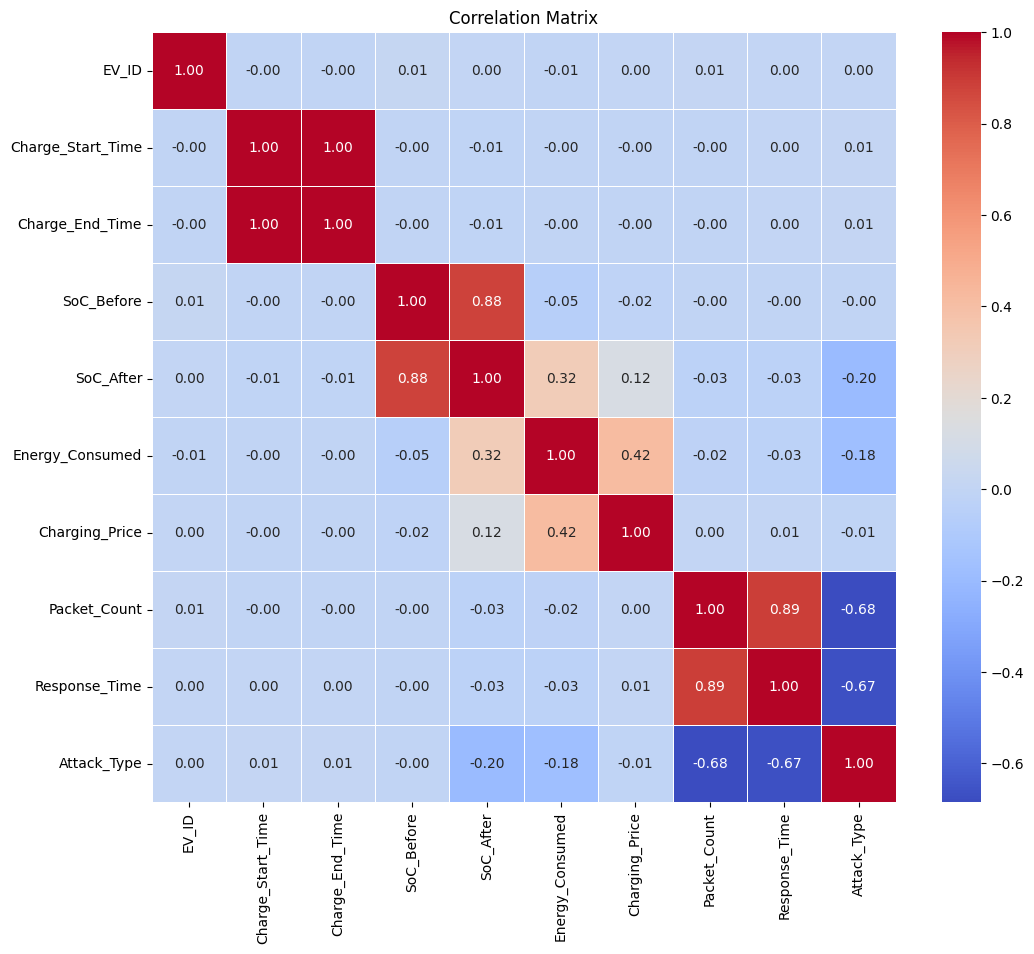

In [5]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Convert start and end times to datetime, then create a new column for charging duration
dataset['Charge_Start_Time'] = pd.to_datetime(dataset['Charge_Start_Time'])
dataset['Charge_End_Time'] = pd.to_datetime(dataset['Charge_End_Time'])
dataset['Charging_Duration'] = (dataset['Charge_End_Time'] - dataset['Charge_Start_Time']).dt.total_seconds() / 3600

In [7]:
# Define features (X) and target (y)
X = dataset.drop(columns=['Attack_Type', 'Charge_Start_Time', 'Charge_End_Time'])
y = dataset['Attack_Type']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

In [8]:
# Initialize the models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)


In [9]:
def evaluate_model(model, X_train, y_train):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")
    return cv_scores.mean()


In [10]:
import warnings
warnings.filterwarnings('ignore')
print("Logistic Regression:")
logistic_accuracy = evaluate_model(logistic_model, X_train, y_train)

print("\nDecision Tree:")
decision_tree_accuracy = evaluate_model(decision_tree_model, X_train, y_train)

print("\nRandom Forest:")
random_forest_accuracy = evaluate_model(random_forest_model, X_train, y_train)

print("\nGradient Boosting:")
gradient_boosting_accuracy = evaluate_model(gradient_boosting_model, X_train, y_train)


Logistic Regression:
Cross-validation scores: [0.95934379 0.94793153 0.96005706 0.95360457 0.95503212]
Mean CV Accuracy: 0.96

Decision Tree:
Cross-validation scores: [0.95292439 0.94222539 0.94935806 0.94361171 0.9379015 ]
Mean CV Accuracy: 0.95

Random Forest:
Cross-validation scores: [0.94507846 0.93865906 0.94864479 0.95289079 0.94147038]
Mean CV Accuracy: 0.95

Gradient Boosting:
Cross-validation scores: [0.9657632  0.95791726 0.96718973 0.96573876 0.9614561 ]
Mean CV Accuracy: 0.96


In [11]:
# Train the best model on the full training data
best_model = random_forest_model  # Assuming Random Forest performed the best
best_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Test Set Performance:
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
